# EastWestAirlines - Clustering

In [1]:
#Import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
#import dataset
psg_data = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data",index_col=0)
psg_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
#Scaling of variables
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
array = scale.fit_transform(psg_data)

## KMeans Clustering

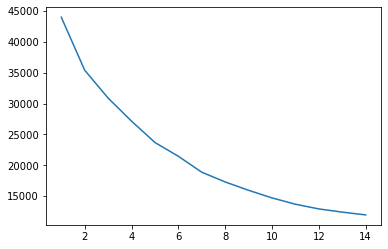

In [4]:
#Find best k number of clusters

wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0, max_iter=1000)
    kmeans.fit(array)
    wcss.append(kmeans.inertia_)

#Elbow graph
plt.plot(range(1,15),wcss)
plt.show()

### From above elbow graph we can conlcude that 7 is optimal number of clusters

In [5]:
#Clustering model
kemas = KMeans(n_clusters=7, random_state=0, max_iter=1000)

In [6]:
#Predicting the clusters
y_k = kemas.fit_predict(array)

#Adding predicted cluster column to the daraframe
psg_data_cstr_k = psg_data.copy()
clusters_k = pd.DataFrame(y_k,columns=["Clusters"],index=psg_data_cstr_k.index)
psg_data_cstr_k = pd.concat([psg_data_cstr_k,clusters_k],axis=1)

### EDA on created clusters

In [7]:
psg_data_cstr_k["Clusters"].value_counts()

2    2067
3     891
1     805
6     122
0      56
4      43
5      15
Name: Clusters, dtype: int64

In [8]:
#Descriptiv statitics of cluster "2"
psg_data_cstr_k[psg_data_cstr_k["Clusters"] == 2].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,2067.000000,2067.000000,2067.000000,2067.0,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.0,2067.0
mean,43394.246734,32.247218,1.311079,1.0,1.000484,4784.531688,7.176101,159.905660,0.479439,3635.080310,0.0,2.0
std,46398.394647,245.658489,0.664031,0.0,0.021995,6625.172336,7.087474,536.776469,1.378137,2059.867345,0.0,0.0
min,50.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,2.0
25%,13892.500000,0.000000,1.000000,1.0,1.000000,197.500000,1.000000,0.000000,0.000000,1857.500000,0.0,2.0
50%,29056.000000,0.000000,1.000000,1.0,1.000000,2010.000000,5.000000,0.000000,0.000000,3456.000000,0.0,2.0
75%,56734.000000,0.000000,1.000000,1.0,1.000000,6291.500000,12.000000,0.000000,0.000000,5174.000000,0.0,2.0
max,456509.000000,2788.000000,3.000000,1.0,2.000000,49364.000000,44.000000,6368.000000,16.000000,8296.000000,0.0,2.0


### Cluster 2 has mean balance available mile is 43394 and Qual_mile is 32

In [9]:
#Descriptiv statitics of cluster "3"
psg_data_cstr_k[psg_data_cstr_k["Clusters"] == 3].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,8.910000e+02,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,1.373937e+05,56.991021,4.108866,1.0,1.002245,47802.755331,19.689113,373.414141,1.138047,5065.318743,0.585859,3.0
std,1.299315e+05,313.626078,0.716138,0.0,0.047351,26744.681420,7.242112,668.842653,2.007855,1842.227724,0.492850,0.0
min,3.268000e+03,0.000000,1.000000,1.0,1.000000,2500.000000,3.000000,0.000000,0.000000,669.000000,0.000000,3.0
25%,6.075650e+04,0.000000,4.000000,1.0,1.000000,30936.500000,15.000000,0.000000,0.000000,3747.000000,0.000000,3.0
50%,1.029420e+05,0.000000,4.000000,1.0,1.000000,41359.000000,18.000000,0.000000,0.000000,5202.000000,1.000000,3.0
75%,1.626805e+05,0.000000,5.000000,1.0,1.000000,58516.000000,22.000000,500.000000,1.000000,6476.500000,1.000000,3.0
max,1.125076e+06,2880.000000,5.000000,1.0,2.000000,263685.000000,53.000000,4130.000000,12.000000,8296.000000,1.000000,3.0


### Cluster 3 has mean balance available mile is 137393 and Qual_mile is 56

In [10]:
#Descriptiv statitics of cluster "1"
psg_data_cstr_k[psg_data_cstr_k["Clusters"] == 1].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,805.000000,805.000000,805.000000,805.0,805.0,805.000000,805.000000,805.000000,805.000000,805.000000,805.0,805.0
mean,57704.306832,99.578882,1.686957,1.0,1.0,10543.357764,10.575155,424.853416,1.304348,4228.881988,1.0,1.0
std,68854.273632,423.344011,0.892975,0.0,0.0,8638.841232,7.198043,811.190767,2.314360,1910.093621,0.0,0.0
min,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,301.000000,1.0,1.0
25%,15920.000000,0.000000,1.000000,1.0,1.0,3250.000000,4.000000,0.000000,0.000000,2607.000000,1.0,1.0
50%,33972.000000,0.000000,1.000000,1.0,1.0,8668.000000,11.000000,0.000000,0.000000,4148.000000,1.0,1.0
75%,68610.000000,0.000000,3.000000,1.0,1.0,16237.000000,15.000000,500.000000,2.000000,5778.000000,1.0,1.0
max,518960.000000,2900.000000,4.000000,1.0,1.0,45403.000000,50.000000,6251.000000,16.000000,8296.000000,1.0,1.0


### Cluster 1 has mean balance available mile is 57704 and Qual_mile is 99

## Hierarchical Clustering

In [11]:
#Dendrogram
# import scipy.cluster.hierarchy as sch

# plt.figure(figsize=(20,20))
# dendrogram = sch.dendrogram(sch.linkage(psg_data_norm,method="single")

In [12]:
#cluster model
hc = AgglomerativeClustering(n_clusters=7,linkage="ward")

In [13]:
#Compute clusters
y_hc = hc.fit_predict(array)

#Adding predicted cluster column to the dataframe
psg_data_cstr_hc = psg_data.copy()
clusters_hc = pd.DataFrame(y_hc,columns=["Clusters"],index=psg_data_cstr_hc.index)
psg_data_cstr_hc = pd.concat([psg_data_cstr_hc,clusters_hc],axis=1)

### EDA on created clusters

In [14]:
#Created clusters
psg_data_cstr_hc["Clusters"].value_counts()

1    1239
0    1232
6    1207
5     130
2     130
3      43
4      18
Name: Clusters, dtype: int64

In [15]:
#Descriptiv statitics of cluster "1"

psg_data_cstr_hc[psg_data_cstr_hc["Clusters"] == 1].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,1239.000000,1239.000000,1239.000000,1239.0,1239.0,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.0
mean,57790.446328,8.602098,1.211461,1.0,1.0,5211.833737,7.789346,357.041162,1.093624,5148.475383,0.364003,1.0
std,68149.528974,80.227125,0.505700,0.0,0.0,5992.454026,6.572574,778.463421,2.160958,1755.445199,0.481344,0.0
min,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,301.000000,0.000000,1.0
25%,16834.500000,0.000000,1.000000,1.0,1.0,918.000000,3.000000,0.000000,0.000000,4037.000000,0.000000,1.0
50%,35569.000000,0.000000,1.000000,1.0,1.0,3430.000000,6.000000,0.000000,0.000000,5317.000000,0.000000,1.0
75%,69835.000000,0.000000,1.000000,1.0,1.0,7227.500000,12.000000,350.000000,1.000000,6398.000000,1.000000,1.0
max,518960.000000,1121.000000,4.000000,1.0,1.0,40256.000000,38.000000,5446.000000,12.000000,8296.000000,1.000000,1.0


### Cluster 1 has mean balance available mile is 57790 and Qual_mile is 8

In [16]:
#Descriptiv statitics of cluster "0"
psg_data_cstr_hc[psg_data_cstr_hc["Clusters"] == 0].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,1.232000e+03,1232.000000,1232.000000,1232.0,1232.0,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.0
mean,1.167584e+05,37.024351,3.672890,1.0,1.0,38535.185065,18.683442,339.391234,1.029221,4756.469968,0.672078,0.0
std,1.397012e+05,234.041616,0.970388,0.0,0.0,27077.883689,6.824512,682.585556,2.109694,1923.522933,0.469647,0.0
min,3.290000e+02,0.000000,1.000000,1.0,1.0,454.000000,3.000000,0.000000,0.000000,486.000000,0.000000,0.0
25%,3.989650e+04,0.000000,3.000000,1.0,1.0,20243.500000,14.000000,0.000000,0.000000,3186.000000,0.000000,0.0
50%,8.057300e+04,0.000000,4.000000,1.0,1.0,33422.000000,17.000000,0.000000,0.000000,4795.000000,1.000000,0.0
75%,1.415068e+05,0.000000,4.000000,1.0,1.0,49244.250000,21.000000,500.000000,1.000000,6280.000000,1.000000,0.0
max,1.704838e+06,2919.000000,5.000000,1.0,1.0,263685.000000,53.000000,6393.000000,23.000000,8296.000000,1.000000,0.0


### Cluster 0 has mean balance available mile is 116758 and Qual_mile is 37

In [17]:
#Descriptiv statitics of cluster "6"
psg_data_cstr_hc[psg_data_cstr_hc["Clusters"] == 6].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,1207.000000,1207.000000,1207.000000,1207.0,1207.0,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.0,1207.0
mean,34564.370340,9.466446,1.277548,1.0,1.0,4515.278376,6.002486,68.813587,0.242751,2353.636288,0.0,6.0
std,34022.063336,106.471558,0.661686,0.0,0.0,7114.359802,6.662747,206.081633,0.680134,1228.029292,0.0,0.0
min,68.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,6.0
25%,10933.000000,0.000000,1.000000,1.0,1.0,35.500000,1.000000,0.000000,0.000000,1452.000000,0.0,6.0
50%,23835.000000,0.000000,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2147.000000,0.0,6.0
75%,47125.000000,0.000000,1.000000,1.0,1.0,5000.000000,10.500000,0.000000,0.000000,3328.500000,0.0,6.0
max,278258.000000,1692.000000,3.000000,1.0,1.0,49364.000000,44.000000,2100.000000,6.000000,5566.000000,0.0,6.0


### Cluster 6 has mean balance available mile is 34564 and Qual_mile is 9

## DBSCAN Clustering

In [18]:
#Cluster model
dbscan = DBSCAN(eps=0.8, min_samples=12)

In [19]:
#Cluster creation
y_dbs = dbscan.fit_predict(array)

#Adding predicted cluster column to the dataframe
psg_data_cstr_dbs = psg_data.copy()
clusters_dbs = pd.DataFrame(y_dbs,columns=["Clusters"],index=psg_data_cstr_dbs.index)
psg_data_cstr_dbs = pd.concat([psg_data_cstr_dbs,clusters_dbs],axis=1)

### EDA on created clusters

In [20]:
psg_data_cstr_dbs["Clusters"].value_counts()

 0    2133
-1     966
 1     821
 2      53
 4      14
 3      12
Name: Clusters, dtype: int64

In [21]:
#Descriptiv statitics of cluster "0"
psg_data_cstr_dbs[psg_data_cstr_dbs["Clusters"] == 0].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,2133.000000,2133.000000,2133.000000,2133.0,2133.0,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.0,2133.0
mean,46273.354430,0.703235,1.556493,1.0,1.0,7397.959212,7.789498,80.463197,0.279419,3753.015940,0.0,0.0
std,43771.303314,18.742668,0.975892,0.0,0.0,10915.370817,7.101333,239.271434,0.773465,2066.728952,0.0,0.0
min,50.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.0,0.0
25%,14598.000000,0.000000,1.000000,1.0,1.0,255.000000,1.000000,0.000000,0.000000,1967.000000,0.0,0.0
50%,32160.000000,0.000000,1.000000,1.0,1.0,2350.000000,6.000000,0.000000,0.000000,3623.000000,0.0,0.0
75%,65664.000000,0.000000,2.000000,1.0,1.0,9634.000000,14.000000,0.000000,0.000000,5359.000000,0.0,0.0
max,252520.000000,500.000000,5.000000,1.0,1.0,56007.000000,38.000000,2220.000000,7.000000,8296.000000,0.0,0.0


### Cluster 0 has mean balance available mile is 46273 and Qual_mile is 0.7

In [22]:
#Descriptiv statitics of cluster "-1" or moisy cluster
psg_data_cstr_dbs[psg_data_cstr_dbs["Clusters"] == -1].describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
count,9.660000e+02,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.0
mean,1.536435e+05,592.975155,2.685300,1.060041,1.050725,34663.012422,19.590062,1587.557971,4.595238,4655.547619,0.628364,-1.0
std,1.658488e+05,1487.309484,1.637112,0.295944,0.394935,35509.749604,11.552344,2496.057383,6.610303,2094.452145,0.483492,0.0
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-1.0
25%,4.825000e+04,0.000000,1.000000,1.000000,1.000000,8138.250000,12.000000,0.000000,0.000000,2870.000000,0.000000,-1.0
50%,1.078940e+05,0.000000,3.000000,1.000000,1.000000,22474.000000,18.000000,700.000000,2.000000,4738.500000,1.000000,-1.0
75%,2.031738e+05,0.000000,4.000000,1.000000,1.000000,54557.000000,26.000000,2200.000000,6.000000,6340.000000,1.000000,-1.0
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000,-1.0


### Cluster -1 cluster has mean balance available mile is 153643 and Qual_mile is 529